In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_delay = pd.read_csv('delayed-bound-experiments-new.csv')
df_base = pd.read_csv('delayed-bound-experiments-bench.csv')

In [3]:
def rename_columns(df: pd.DataFrame) -> None:
    df.rename(columns={
        'name': 'Instance',
        'execution_time': 't',
        'lower_bound': 'LB',
        'nodes': 'Nodes'
    }, inplace=True)

In [4]:
rename_columns(df_delay)
rename_columns(df_base)

In [5]:
df_out = pd.merge(
    df_delay[['Instance', 't']],
    df_base[['Instance', 't', 'LB', 'Nodes']],
    on='Instance',
    suffixes=('(p)', '(*)'),
)

df_out.insert(3, 't(p) / t(*)', df_out['t(p)'] / df_out['t(*)'])
groups = df_out["Instance"].apply(lambda x: ((int(x[-2:]) - 1) // 10) + 1)
df_out.insert(0, 'Group', groups)
print(df_out)

    Group Instance        t(p)        t(*)  t(p) / t(*)      LB    Nodes
0       1    ta001    0.001992    0.003129     0.636495  1278.0       85
1       1    ta002    0.296889    0.406076     0.731117  1359.0    26019
2       1    ta003    0.002696    0.001713     1.573755  1081.0       21
3       1    ta004    0.002096    0.004036     0.519405  1293.0       16
4       1    ta005    0.788920    0.869514     0.907311  1235.0    82199
5       1    ta006    0.003346    0.003719     0.899853  1195.0       58
6       1    ta007    0.000493    0.000579     0.850967  1234.0        1
7       1    ta008    0.001222    0.003550     0.344124  1206.0       21
8       1    ta009    0.004854    0.007719     0.628830  1230.0      454
9       1    ta010    0.000615    0.002220     0.277014  1108.0        5
10      2    ta011    2.651254    2.934570     0.903456  1582.0   183654
11      2    ta012    1.752966    2.358357     0.743300  1659.0   109364
12      2    ta013    4.382737    4.998726     0.87

In [6]:
def agg_instances(x: pd.Series) -> str:
    if len(x) > 1:
        return f"{x.min()}-{x.max()}"
    else:
        return str(x.iloc[0])

In [7]:
df_out.groupby('Group', as_index=False).agg({
    'Instance': agg_instances,
    't(p)': 'mean',
    't(*)': 'mean',
    't(p) / t(*)': 'mean'
}).rename(columns={'Instance': 'Instances'})

,Group,Instances,t(p),t(*),t(p) / t(*)
0,1,ta001-ta010,0.110312,0.130226,0.736887
1,2,ta011-ta020,23.103618,26.386810,0.775305
2,4,ta031-ta040,0.004120,0.008494,0.616399
3,5,ta041-ta050,50.878019,108.557520,0.412618


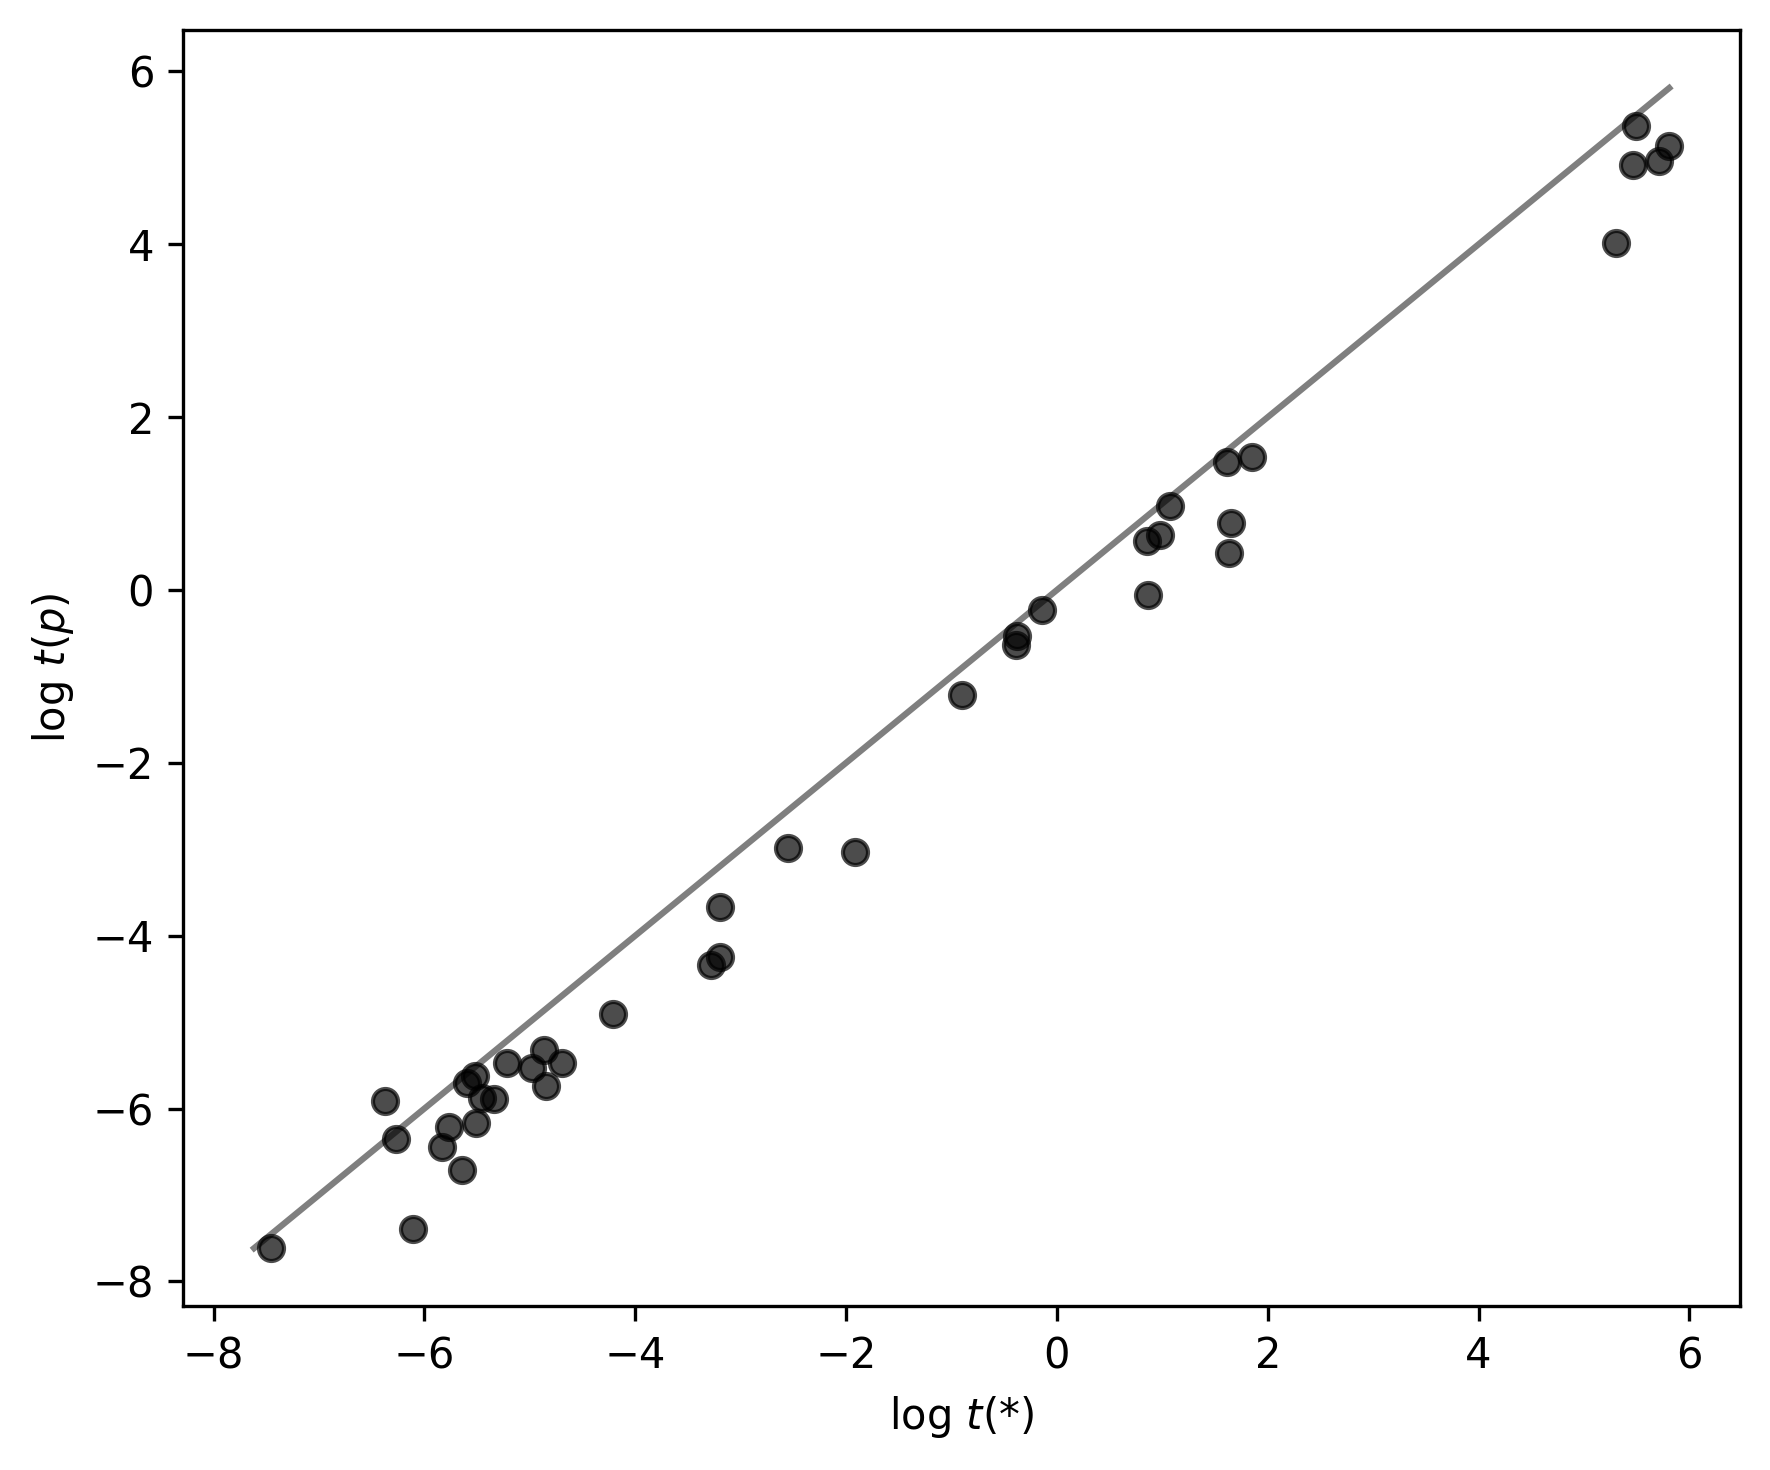

In [9]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
ax.scatter(
    np.log(df_out['t(*)']), np.log(df_out['t(p)']), alpha=0.7, c='black'
)
min_val = min(np.log(df_out['t(*)'].min()), np.log(df_out['t(p)'].min()))
max_val = max(np.log(df_out['t(*)'].max()), np.log(df_out['t(p)'].max()))
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    color='black',
    linestyle='-',
    alpha=0.5,
)
ax.set_xlabel('log $t(*)$')
ax.set_ylabel('log $t(p)$')
fig.tight_layout()
plt.savefig('early-pruning.pdf', bbox_inches='tight')
plt.show()

In [8]:
# Format the values with proper rounding
df_out['t(p)'] = df_out['t(p)'].round(1)
df_out['t(*)'] = df_out['t(*)'].round(1)
df_out['LB'] = df_out['LB'].astype(int)
df_out['t(p) / t(*)'] = df_out['t(p) / t(*)'].round(1)

print(df_out.head())
df_out.to_csv('early-pruning-comparison.csv', index=False)

   Group Instance  t(p)  t(*)  t(p) / t(*)    LB  Nodes
0      1    ta001   0.0   0.0          0.6  1278     85
1      1    ta002   0.3   0.4          0.7  1359  26019
2      1    ta003   0.0   0.0          1.6  1081     21
3      1    ta004   0.0   0.0          0.5  1293     16
4      1    ta005   0.8   0.9          0.9  1235  82199


In [9]:
df_out.groupby('Group', as_index=False).agg({
    'Instance': agg_instances,
    't(p)': 'mean',
    't(*)': 'mean',
    't(p) / t(*)': 'mean',
}).rename(columns={'Instance': 'Instances'}).to_csv(
    'early-pruning-comparison-groups.csv', index=False
)

/home/bruscalia/bnbpy/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_55186/244597502.py:5: RuntimeWarning: divide by zero encountered in log
  min_val = min(np.log(df_out['t(*)'].min()), np.log(df_out['t(p)'].min()))


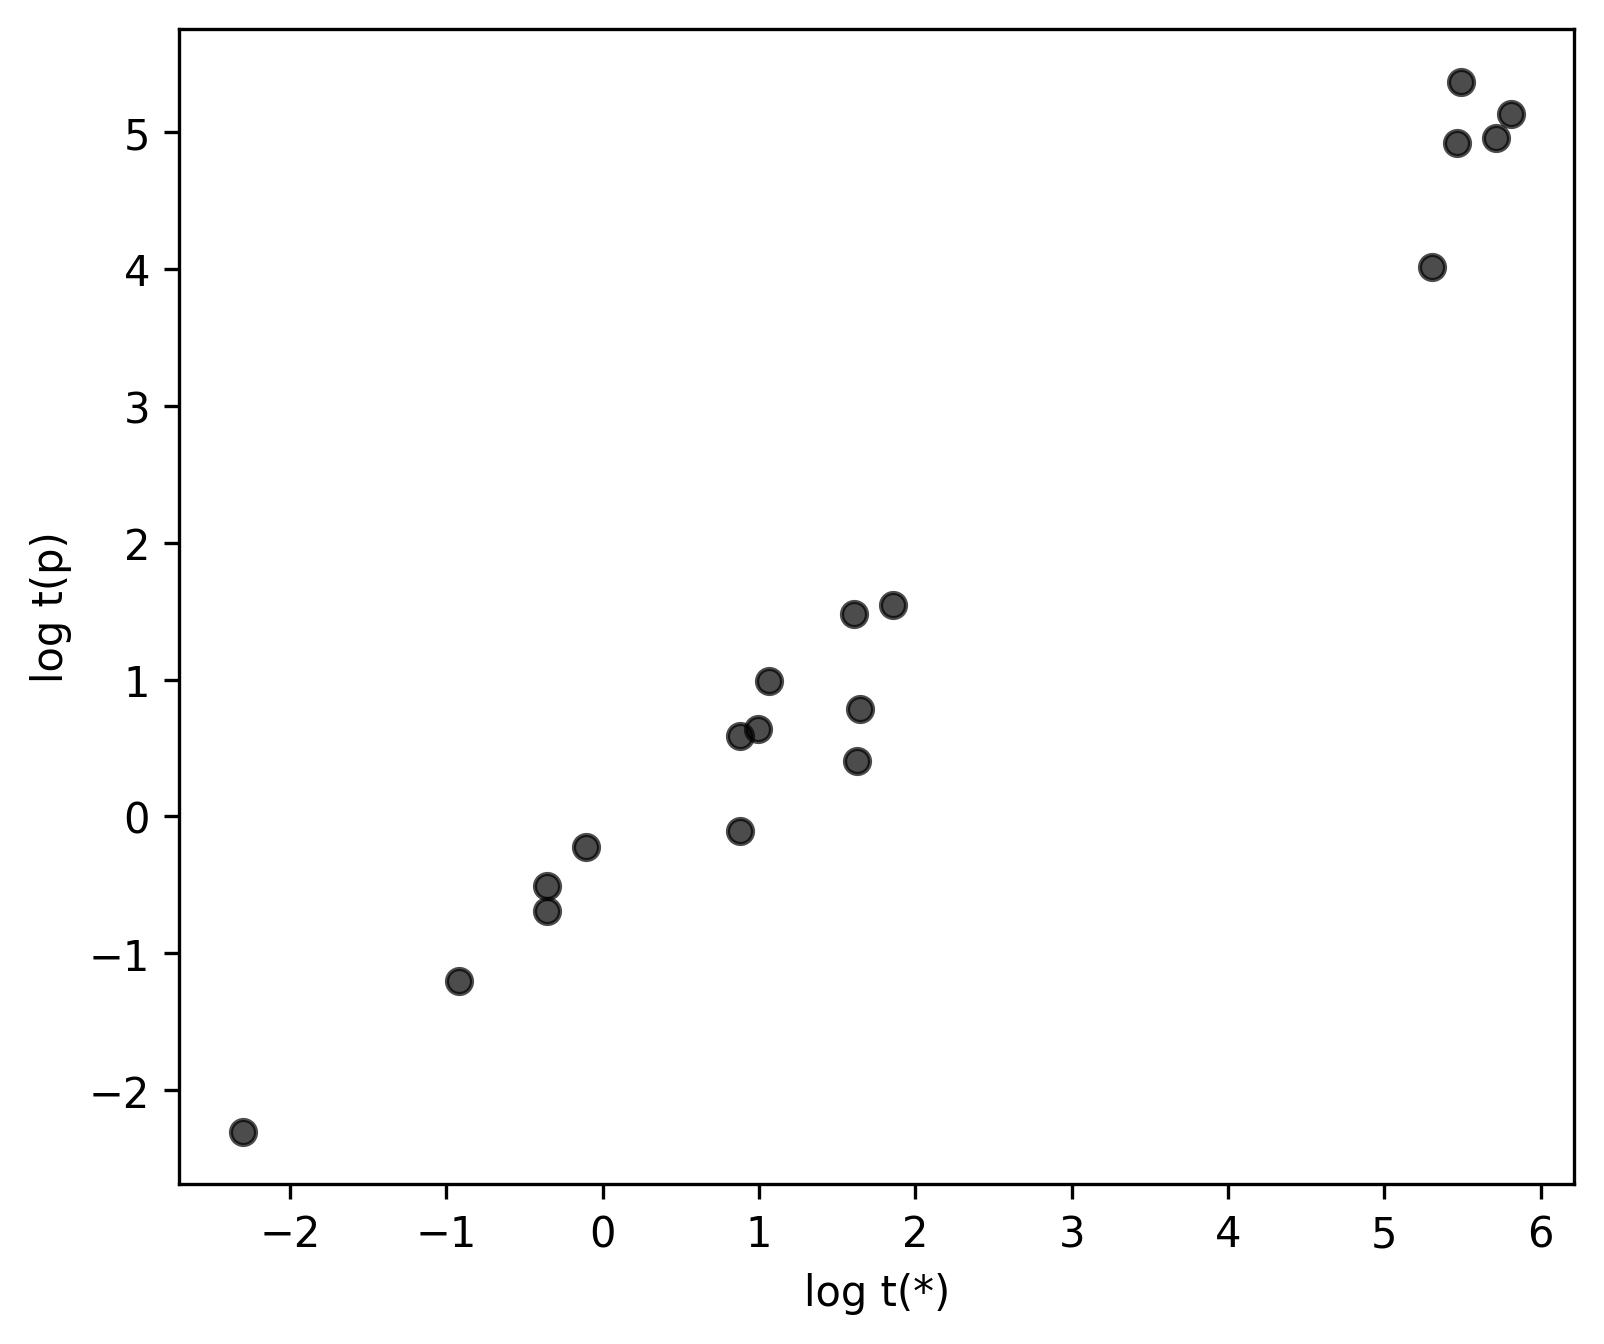

In [13]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
ax.scatter(np.log(df_out['t(*)']), np.log(df_out['t(p)']), alpha=0.7, c="black")
min_val = min(np.log(df_out['t(*)'].min()), np.log(df_out['t(p)'].min()))
max_val = max(np.log(df_out['t(*)'].max()), np.log(df_out['t(p)'].max()))
ax.plot([min_val, min_val], [max_val, max_val], color='grey', linestyle='--')
ax.set_xlabel('log t(*)')
ax.set_ylabel('log t(p)')
plt.show()

In [21]:
df_out.sum(axis=0)

Instance    ta001ta002ta003ta004ta005ta006ta007ta008ta009t...
t(p)                                                    741.0
t(*)                                                   1350.8
t ratio                                                  25.4
LB                                                      84553
Nodes                                                27270132
dtype: object